In [2]:
import numpy as np
import pandas as pd

days = 365
t = np.arange(days)

# Generate date range
start_date = '2024-11-14'
date_range = pd.date_range(start=start_date, periods=days, freq='D')

# Outdoor temperature: mean 15°C, amplitude 10°C, daily noise
T_outdoor = 20 + 9 * np.sin(2 * np.pi * t / 365)
T_outdoor += np.random.normal(0, 2, days)

# Room parameters
T_room = np.zeros(days)
T_room[0] = 22  # Initial room temp
tau = 5         # Insulation time constant (days)
Q_internal = 0.2  # Internal heat gain per day (°C)

# Heating/Cooling system
heating_setpoint = 20   # °C
cooling_setpoint = 23  # °C
heating_power = 2.0     # °C per day when heating is ON
cooling_power = 2.0     # °C per day when cooling is ON


In [3]:
heating_on = np.zeros(days)
cooling_on = np.zeros(days)

for day in range(1, days):
    # Passive change (insulation + internal heat)
    dT = (T_outdoor[day-1] - T_room[day-1]) / tau + Q_internal

    # Heating system logic
    if T_room[day-1] < heating_setpoint:
        dT += heating_power
        heating_on[day] = 1

    # Cooling system logic
    if T_room[day-1] > cooling_setpoint:
        dT -= cooling_power
        cooling_on[day] = 1

    T_room[day] = T_room[day-1] + dT
    

    # Clamp to realistic bounds (optional, for dashboard aesthetics)
    #T_room[day] = max(cooling_setpoint-1, min(heating_setpoint+1, T_room[day]))

# Generate air quality data between 5 and 8 µg/m³
air_quality = np.random.uniform(12, 18, days)
air_quality = np.round(air_quality, 2)

humidity = np.random.uniform(45, 55, days)
humidity = np.round(humidity, 1)

light_intensity = (np.random.uniform(800, 1000, days) + np.random.normal(0, 50, days)) / 2 
light_intensity = np.round(light_intensity, 0)

sound_level = (np.random.uniform(70, 80, days) + np.random.normal(40, 45, days)) / 2 
sound_level = np.round(sound_level, 0)


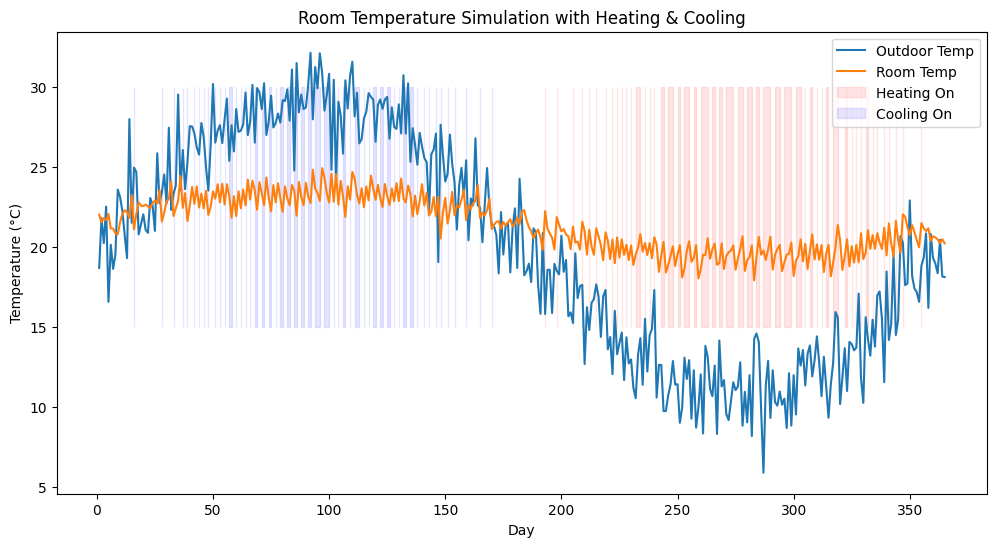

In [4]:
df = pd.DataFrame({
    'Date': date_range,
    'Day': t + 1,
    'Outdoor_Temp': T_outdoor,
    'Room_Temp': np.round(T_room, 2),
    'Air_Quality': air_quality,
    'Humidity': humidity,
    'Light_Intensity': light_intensity,
    'Sound_Level': sound_level,
    'Heating_On': heating_on,
    'Cooling_On': cooling_on
})


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Day'], df['Outdoor_Temp'], label='Outdoor Temp')
plt.plot(df['Day'], df['Room_Temp'], label='Room Temp')
plt.fill_between(df['Day'], 15, 30, where=df['Heating_On']==1, color='red', alpha=0.1, label='Heating On')
plt.fill_between(df['Day'], 15, 30, where=df['Cooling_On']==1, color='blue', alpha=0.1, label='Cooling On')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Room Temperature Simulation with Heating & Cooling')
plt.show()

In [5]:
df2 = df[['Date', 'Room_Temp', 'Air_Quality', 'Humidity', 'Light_Intensity', 'Sound_Level']]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Room_Temp        365 non-null    float64       
 2   Air_Quality      365 non-null    float64       
 3   Humidity         365 non-null    float64       
 4   Light_Intensity  365 non-null    float64       
 5   Sound_Level      365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [159]:
df2.to_csv('synthetic_data/property_10_sensor_data.csv', index=False)